/var/folders/gr/34nn6j6d5xq9vjl2cgksvbsw0000gn/T/ipykernel_63501/2670652874.py:33: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad(color='none')


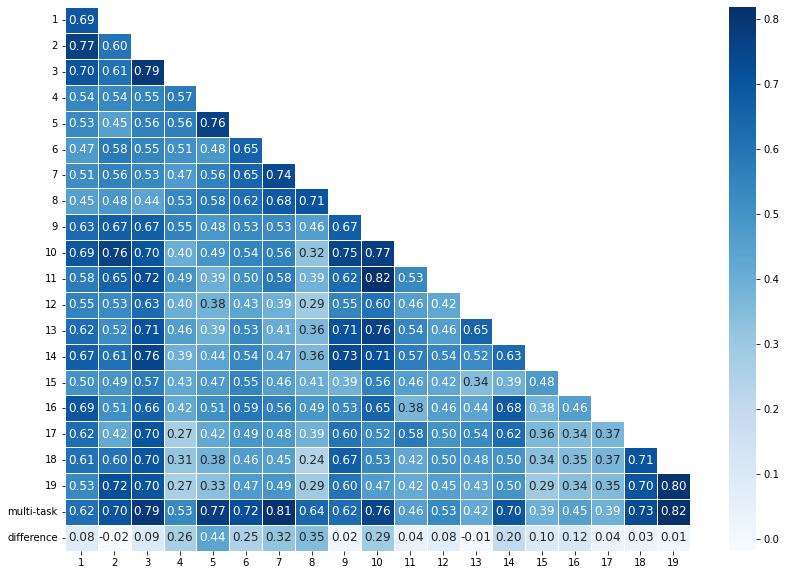

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# 读取CSV文件
sheet_name = 'order1_JOINT'
df_seq = pd.read_excel('sequence_heatmap.xlsx', sheet_name=sheet_name)
df_multi = pd.read_excel('multi_task_heatmap.xlsx', sheet_name=sheet_name)

df = pd.concat([df_seq, df_multi], axis=0)
# 选择数值列
numeric_cols = df.select_dtypes(include=[np.number])

# 计算最后两行的差值
diff = numeric_cols.iloc[-2:].diff().iloc[-1]
diff = pd.DataFrame(diff).T

df = pd.concat([df, diff])

# 更改新行的标签
df.iloc[-1, df.columns.get_loc('Domain')] = 'multi0tasj'

# 设置图形大小
fig, ax = plt.subplots(figsize=(14, 10))

# 创建一个mask，只显示下半部分的热力图，包括对角线
mask = np.triu(np.ones_like(df.set_index('Domain'), dtype=bool), k=1)

# 创建一个新的颜色映射，将“bad”颜色设置为透明
cmap = plt.cm.Blues
cmap.set_bad(color='none')

# 创建热力图，将注释放在方格的中间
sns.heatmap(df.set_index('Domain'), cmap='Blues', annot=True, fmt=".2f", linewidths=.5, mask=mask, annot_kws={"size": 12, "ha": 'center', "va": 'center'})

# 创建一个新的标签列表，其中包含1到19和"multi-task"
yticklabels = list(range(1, 20)) + ['multi-task'] + ['difference']

# 设置x轴和y轴的标签
plt.xticks(np.arange(0.5, 19, 1), np.arange(1, 20), rotation=0)
plt.yticks(np.arange(0.5, len(df.index), 1), yticklabels)

# 去掉y轴的标签"Domain"
ax.set_ylabel('')

# 保存图像为 PDF 格式
plt.savefig('heatmap.pdf', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()